# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import math
from datetime import date

# call today date to show the date when the results were run
# as the temperture is changing realtime
today = date.today()

# create this fucntion to round up and get a nice x-axis and y-axis labels
def round_up(var):
    return int(math.ceil(var / 10.0)) * 10

def round_dn(var):
    return int(math.floor(var / 10.0)) * 10

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
cities = [citi.title() for citi in cities]
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# create base url for API access
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create empty list to hold each city parameters and group data set
weather_response_master =[]
lat = []
lng = []
cloudi_n = []
country = []
date = []
humid =[]
maxtemp = []
wind_spd =[]

count = 0 
set = 1
invalid_ct = 0

print("BEGINNING DATA RETRIEVAL ...\n\
=========================================================")
for each_city in cities:
    city = each_city
    Qry_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response_each_city = requests.get(Qry_url).json()

    if weather_response_each_city['cod'] == '404':
        print(f'City \033[1;34m"{each_city}"\033[00m \033[1;31mNOT FOUND !!! \033[00m Skipping...')
        invalid_ct += 1
    else:
        count += 1
        if count <50:
            set = set
        else:
            set = set + 1
            count = 1
        weather_response_master.append(weather_response_each_city)
        print(f'Processing\033[1;34m Records # {count}\033[00m of \033[1;34mSet # {set}\033[00m | \033[1;32m{each_city}\033[00m')
        lat.append(weather_response_each_city['coord']['lat'])
        lng.append(weather_response_each_city['coord']['lon'])
        cloudi_n.append(weather_response_each_city['clouds']['all'])
        country.append(weather_response_each_city['sys']['country']) 
        date.append(weather_response_each_city['dt']) 
        humid.append(weather_response_each_city['main']['humidity']) 
        maxtemp.append(weather_response_each_city['main']['temp_max']) 
        wind_spd.append(weather_response_each_city['wind']['speed'])

print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print(f'There are: \033[1;34m{invalid_ct}\033[00m cities with \033[1;31mNO RECORDS\033[00m.')
print('=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=')      

BEGINNING DATA RETRIEVAL ...
City "Amderma" NOT FOUND !!!  Skipping...
Processing Records # 1 of Set # 1 | Puerto Ayora
Processing Records # 2 of Set # 1 | Carnarvon
Processing Records # 3 of Set # 1 | Krynychky
Processing Records # 4 of Set # 1 | Buin
Processing Records # 5 of Set # 1 | Busselton
Processing Records # 6 of Set # 1 | Saint-Philippe
Processing Records # 7 of Set # 1 | Nome
Processing Records # 8 of Set # 1 | Butaritari
Processing Records # 9 of Set # 1 | Barrow
City "Meyungs" NOT FOUND !!!  Skipping...
Processing Records # 10 of Set # 1 | Dengzhou
Processing Records # 11 of Set # 1 | Rikitea
Processing Records # 12 of Set # 1 | Mataura
Processing Records # 13 of Set # 1 | Yuanping
Processing Records # 14 of Set # 1 | Jamestown
Processing Records # 15 of Set # 1 | Mahebourg
Processing Records # 16 of Set # 1 | Airai
City "Belushya Guba" NOT FOUND !!!  Skipping...
Processing Records # 17 of Set # 1 | Padang
Processing Records # 18 of Set # 1 | Hami
Processing Records # 19 

City "Nizhneyansk" NOT FOUND !!!  Skipping...
City "Mrirt" NOT FOUND !!!  Skipping...
Processing Records # 43 of Set # 2 | Esna
Processing Records # 44 of Set # 2 | Sabya
Processing Records # 45 of Set # 2 | Pinawa
Processing Records # 46 of Set # 2 | Tevaitoa
Processing Records # 47 of Set # 2 | Ahipara
Processing Records # 48 of Set # 2 | Coahuayana
Processing Records # 49 of Set # 2 | Troy
Processing Records # 1 of Set # 3 | Isangel
Processing Records # 2 of Set # 3 | Utraula
Processing Records # 3 of Set # 3 | Husavik
Processing Records # 4 of Set # 3 | Shubarkuduk
Processing Records # 5 of Set # 3 | Roald
Processing Records # 6 of Set # 3 | Shinuhayr
Processing Records # 7 of Set # 3 | Norman Wells
Processing Records # 8 of Set # 3 | Cayenne
Processing Records # 9 of Set # 3 | Gijon
Processing Records # 10 of Set # 3 | Chuy
Processing Records # 11 of Set # 3 | Nabire
Processing Records # 12 of Set # 3 | Kentau
Processing Records # 13 of Set # 3 | Provideniya
Processing Records # 1

Processing Records # 40 of Set # 4 | Remedios
Processing Records # 41 of Set # 4 | Maracas
Processing Records # 42 of Set # 4 | Gorontalo
Processing Records # 43 of Set # 4 | Nizhniy Kuranakh
Processing Records # 44 of Set # 4 | Petatlan
Processing Records # 45 of Set # 4 | Tessalit
Processing Records # 46 of Set # 4 | Laguna
Processing Records # 47 of Set # 4 | Chokurdakh
Processing Records # 48 of Set # 4 | Inhambane
Processing Records # 49 of Set # 4 | Ulcinj
Processing Records # 1 of Set # 5 | Vaitape
Processing Records # 2 of Set # 5 | Alamosa
Processing Records # 3 of Set # 5 | Soubre
Processing Records # 4 of Set # 5 | Meulaboh
Processing Records # 5 of Set # 5 | Antibes
Processing Records # 6 of Set # 5 | Saint George
Processing Records # 7 of Set # 5 | Belomorsk
Processing Records # 8 of Set # 5 | Togur
Processing Records # 9 of Set # 5 | Kalmunai
Processing Records # 10 of Set # 5 | Henties Bay
City "Rawannawi" NOT FOUND !!!  Skipping...
Processing Records # 11 of Set # 5 | G

Processing Records # 39 of Set # 6 | Saint-Francois
Processing Records # 40 of Set # 6 | Waipawa
City "Tumannyy" NOT FOUND !!!  Skipping...
Processing Records # 41 of Set # 6 | Puerto Del Rosario
Processing Records # 42 of Set # 6 | Sabirabad
Processing Records # 43 of Set # 6 | Macheng
Processing Records # 44 of Set # 6 | Saldanha
City "Viligili" NOT FOUND !!!  Skipping...
Processing Records # 45 of Set # 6 | General Salgado
Processing Records # 46 of Set # 6 | Centralia
Processing Records # 47 of Set # 6 | Codrington
Processing Records # 48 of Set # 6 | Kano
Processing Records # 49 of Set # 6 | Djambala
Processing Records # 1 of Set # 7 | Kruisfontein
Processing Records # 2 of Set # 7 | Saravan
Processing Records # 3 of Set # 7 | Bilibino
Processing Records # 4 of Set # 7 | Denpasar
Processing Records # 5 of Set # 7 | Teguise
City "Grand River South East" NOT FOUND !!!  Skipping...
City "Inderborskiy" NOT FOUND !!!  Skipping...
Processing Records # 6 of Set # 7 | Berlevag
Processing 

Processing Records # 32 of Set # 8 | Srednekolymsk
Processing Records # 33 of Set # 8 | Khor
Processing Records # 34 of Set # 8 | Bressuire
Processing Records # 35 of Set # 8 | Atambua
Processing Records # 36 of Set # 8 | Warmbad
Processing Records # 37 of Set # 8 | Pimentel
Processing Records # 38 of Set # 8 | Batagay
Processing Records # 39 of Set # 8 | Sakakah
Processing Records # 40 of Set # 8 | Nazare
Processing Records # 41 of Set # 8 | Astoria
Processing Records # 42 of Set # 8 | Saint-Joseph
Processing Records # 43 of Set # 8 | Mackay
Processing Records # 44 of Set # 8 | Saint-Georges
Processing Records # 45 of Set # 8 | Danville
Processing Records # 46 of Set # 8 | Bhawana
Processing Records # 47 of Set # 8 | Geraldton
Processing Records # 48 of Set # 8 | Camacari
Processing Records # 49 of Set # 8 | Saint Joseph
Processing Records # 1 of Set # 9 | Petropavlovsk-Kamchatskiy
Processing Records # 2 of Set # 9 | Viedma
Processing Records # 3 of Set # 9 | Mehamn
Processing Records

Processing Records # 29 of Set # 10 | Muborak
Processing Records # 30 of Set # 10 | Miri
Processing Records # 31 of Set # 10 | Flinders
Processing Records # 32 of Set # 10 | Matamoros
City "Dzhusaly" NOT FOUND !!!  Skipping...
Processing Records # 33 of Set # 10 | Tlancualpican
Processing Records # 34 of Set # 10 | Mecca
Processing Records # 35 of Set # 10 | Kidal
Processing Records # 36 of Set # 10 | Idlib
Processing Records # 37 of Set # 10 | Seoul
Processing Records # 38 of Set # 10 | Pedernales
City "Jabiru" NOT FOUND !!!  Skipping...
Processing Records # 39 of Set # 10 | Sedam
Processing Records # 40 of Set # 10 | Xining
Processing Records # 41 of Set # 10 | Khorixas
Processing Records # 42 of Set # 10 | Krasnorechenskiy
Processing Records # 43 of Set # 10 | Merauke
Processing Records # 44 of Set # 10 | Flin Flon
Processing Records # 45 of Set # 10 | Sioux Lookout
Processing Records # 46 of Set # 10 | Buchanan
Processing Records # 47 of Set # 10 | Hamilton
Processing Records # 48 

Processing Records # 24 of Set # 12 | Ust-Tarka
City "Mocambique" NOT FOUND !!!  Skipping...
Processing Records # 25 of Set # 12 | Key West
City "Ardistan" NOT FOUND !!!  Skipping...
Processing Records # 26 of Set # 12 | Tianpeng
Processing Records # 27 of Set # 12 | Skjervoy
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
There are: 51 cities with NO RECORDS.
=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=


In [23]:
# Verify data integrity while looping

if len(cities) == len(country) + invalid_ct:
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(cities) - len(country) - invalid_ct} records.')

All records are accounted for.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
main_df = pd.DataFrame({
    "City_ID" : [C_ID for C_ID in range(0, len(country))],
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Cloudiness" : cloudi_n,
    "Humidity" : humid,
    "Max Temp" : maxtemp,
    "Wind Speed" : wind_spd
     })

main_df.to_csv(output_data_file, index=False)
main_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,EC,1584074944,-0.74,-90.35,47,100,299.26,3.70
1,1,AU,1584074944,-24.87,113.63,75,32,309.15,7.70
2,2,UA,1584074944,48.38,34.47,100,56,280.15,7.00
3,3,CL,1584074944,-33.73,-70.75,0,68,291.15,3.10
4,4,AU,1584074944,-33.65,115.33,84,28,301.48,5.65
...,...,...,...,...,...,...,...,...,...
561,561,PT,1584075084,33.07,-16.34,40,77,290.15,6.20
562,562,RU,1584075084,55.57,75.70,0,77,270.37,5.87
563,563,US,1584075084,24.56,-81.78,1,78,297.15,4.10
564,564,CN,1584075084,30.99,103.94,20,55,294.26,5.60


In [18]:
main_df.count()

City_ID       566
Country       566
Date          566
Latitude      566
Longitude     566
Cloudiness    566
Humidity      566
Max Temp      566
Wind Speed    566
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

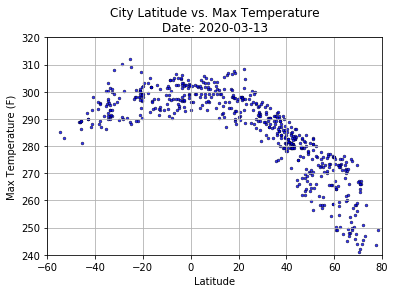

In [271]:
# Define data to plot
x_axis_lat_temp = main_df['Latitude']
y_axis_lat_temp = main_df['Max Temp']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(round_dn(x_axis_lat_temp.min()),\
         round_up(x_axis_lat_temp.max()))
plt.ylim(round_dn(y_axis_lat_temp.min()),\
         round_up(y_axis_lat_temp.max()))
plt.title(f"City Latitude vs. Max Temperature\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_temp, y_axis_lat_temp, linewidths=0.5, \
            marker ='o', facecolors='b', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_temp.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Humidity Plot

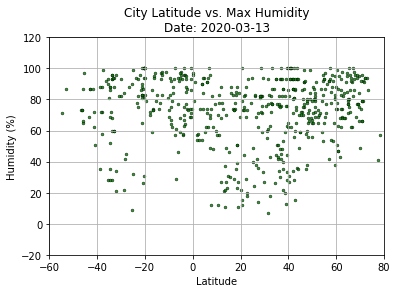

In [272]:
# Define data to plot
x_axis_lat_humd = main_df['Latitude']
y_axis_lat_humd = main_df['Humidity']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(round_dn(x_axis_lat_humd.min()),\
         round_up(x_axis_lat_humd.max()))
plt.ylim(round_dn(y_axis_lat_humd.min()) - 20,\
         round_up(y_axis_lat_humd.max()) + 20)
plt.title(f"City Latitude vs. Max Humidity\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_humd, y_axis_lat_humd, linewidths=0.5, \
            marker ='o', facecolors='g', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_humd.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Cloudiness Plot

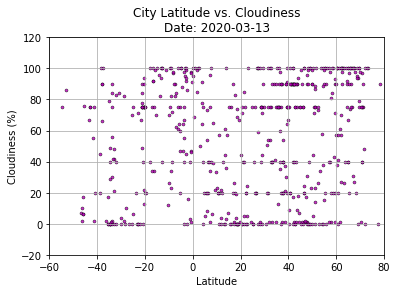

In [273]:
# define data to plot
x_axis_lat_cld = main_df['Latitude']
y_axis_lat_cld = main_df['Cloudiness']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(round_dn(x_axis_lat_cld.min()),\
         round_up(x_axis_lat_cld.max()))
plt.ylim(round_dn(y_axis_lat_cld.min()) - 20,\
         round_up(y_axis_lat_cld.max()) + 20)
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_cld, y_axis_lat_cld, linewidths=0.5, \
            marker ='o', facecolors = 'm', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_cld.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Wind Speed Plot

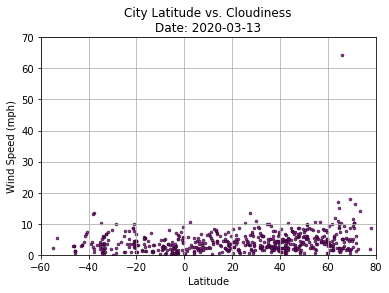

In [274]:
# define data to plot
x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(round_dn(x_axis_lat_wnspd.min()),\
         round_up(x_axis_lat_wnspd.max()))
plt.ylim(round_dn(y_axis_lat_wnspd.min()),\
         round_up(y_axis_lat_wnspd.max()))
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_wnspd, y_axis_lat_wnspd, linewidths=0.5, \
            marker ='o', facecolors = 'purple', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_wnspd.name
plt.savefig(file_name)
plt.show()

## Linear Regression

In [407]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
def lin_regr (x_lin, y_lin, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lin, y_lin)
    
     # print r-sqr values
    print('---------------------------------------------')
    print(f"The r-squared value is: \033[1;34m{round(rvalue, 2)}\033[00m") 
    
    # regression equation
    regress_values = x_lin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'Linear Regression: \033[1;31m{line_eq}\033[00m')
    print('---------------------------------------------')
    
    # create plot parameters
    plt.scatter(x_lin, y_lin, linewidths=0.5, \
            marker ='o', facecolors = 'g', edgecolors = 'k',\
            alpha = 0.8, s = 10)
    plt.plot(x_lin,regress_values,"r-", )
    x_var_mean = x_lin.median()
    y_var_mean = (y_lin.mean() + y_lin.max()) /2
    plt.annotate(line_eq,
                 xy = (x_var_mean, y_var_mean),
                 xycoords='data',
                 xytext=(5, -5),
                 va='bottom',
                 textcoords='offset points', 
                 fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle = "-", linewidth = 0.3)
    
    
    # print correct hemisphere region for chart name and title based on latitude
    if x_lin.mean() < 0:   # South hemisphere : negative latitudes
        title =  f'Southern Hemisphere | Date: {today}\n\
        {x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Southern_" + y_lin.name
        plt.savefig(file_name)
                 
    else:
        title =  f'Northern Hemisphere | Date: {today}\n\
        {x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Northern_" + y_lin.name
        plt.savefig(file_name)  

---------------------------------------------
The r-squared value is: 0.19
Linear Regression: y = 0.02x + 3.8
---------------------------------------------


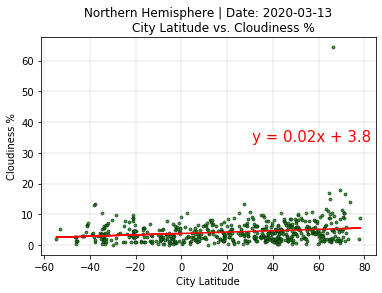

In [408]:
# TEST if the function is working

x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']
x_label = 'City Latitude'
y_label = 'Cloudiness %'

lin_regr (x_axis_lat_wnspd, y_axis_lat_wnspd, x_label, y_label)

# Delete the trial run picture after verifying
import os
try:
    os.remove("Images/" + "Southern_" + y_axis_lat_wnspd.name + ".png")
except: 
    os.remove("Images/" + "Northern_" + y_axis_lat_wnspd.name + ".png")


In [392]:
# Create Northern and Southern Hemisphere DataFrames
nth_hem_df = main_df.loc[main_df["Latitude"] > 0, :]
nth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
2,2,UA,1584074944,48.38,34.47,100,56,280.15,7.00
6,6,US,1584074899,64.50,-165.41,75,85,268.15,8.70
7,7,KI,1584074687,3.07,172.79,50,74,301.67,2.50
8,8,US,1584074945,71.29,-156.79,90,92,267.15,16.50
9,9,CN,1584074687,37.81,120.75,54,35,275.73,3.93
...,...,...,...,...,...,...,...,...,...
561,561,PT,1584075084,33.07,-16.34,40,77,290.15,6.20
562,562,RU,1584075084,55.57,75.70,0,77,270.37,5.87
563,563,US,1584075084,24.56,-81.78,1,78,297.15,4.10
564,564,CN,1584075084,30.99,103.94,20,55,294.26,5.60


In [393]:
sth_hem_df = main_df.loc[main_df["Latitude"] < 0, :]
sth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,EC,1584074944,-0.74,-90.35,47,100,299.26,3.70
1,1,AU,1584074944,-24.87,113.63,75,32,309.15,7.70
3,3,CL,1584074944,-33.73,-70.75,0,68,291.15,3.10
4,4,AU,1584074944,-33.65,115.33,84,28,301.48,5.65
5,5,RE,1584074944,-21.36,55.77,75,83,300.15,8.70
...,...,...,...,...,...,...,...,...,...
545,545,NZ,1584075081,-45.75,170.57,6,66,289.26,1.34
546,546,ZW,1584075081,-16.81,29.69,34,86,292.65,5.03
553,553,PE,1584075082,-9.09,-78.58,82,67,297.30,2.16
554,554,NZ,1584075082,-37.88,176.75,66,58,295.37,1.79


In [394]:
# Verify data integrity after splitting

if len(main_df.index) == len(sth_hem_df.index) + len(nth_hem_df.index):
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(main_df.index) - len(sth_hem_df.index) + len(nth_hem_df.index)} records.')

All records are accounted for.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.89
Linear Regression: y = -0.7x + 308.67
---------------------------------------------


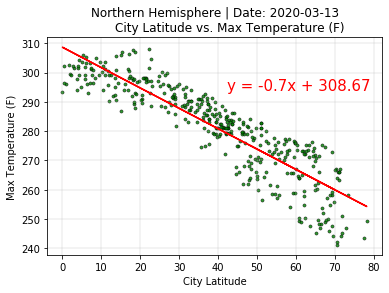

In [409]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.53
Linear Regression: y = 0.22x + 301.27
---------------------------------------------


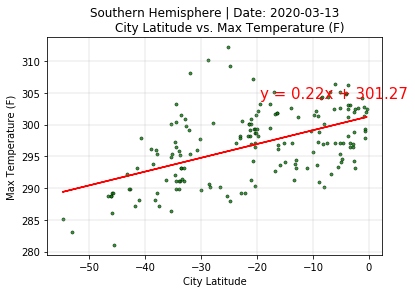

In [410]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.27
Linear Regression: y = 0.3x + 58.36
---------------------------------------------


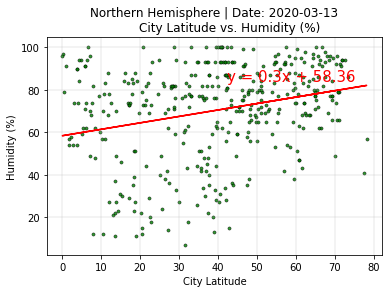

In [411]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.14
Linear Regression: y = 0.2x + 81.54
---------------------------------------------


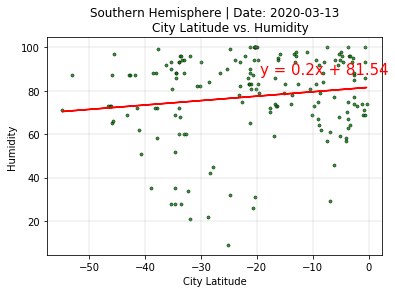

In [412]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.25
Linear Regression: y = 0.48x + 34.99
---------------------------------------------


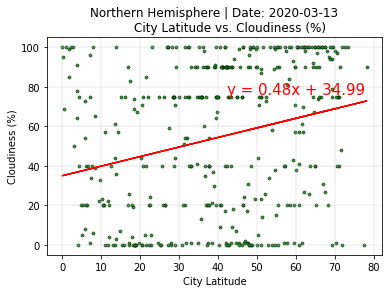

In [414]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.33
Linear Regression: y = 0.85x + 72.12
---------------------------------------------


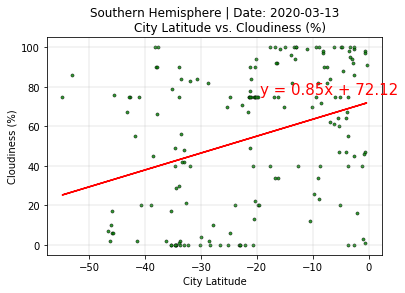

In [415]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.21
Linear Regression: y = 0.05x + 2.81
---------------------------------------------


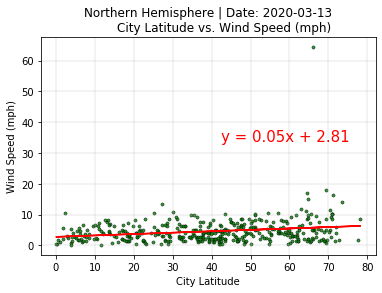

In [416]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.12
Linear Regression: y = -0.02x + 3.11
---------------------------------------------


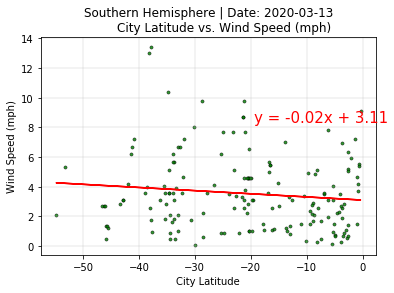

In [417]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )